In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import preprocessing
import ipywidgets as widgets
import logging
import seaborn as sns
from IPython.display import display
import warnings
le = preprocessing.LabelEncoder()
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Handling logger
logger = logging.getLogger()
#Ensuring single handler
if not logger.handlers:
    fhandler = logging.FileHandler(filename='test_log.log', mode='a')
    logger.addHandler(fhandler)
    formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    fhandler.setFormatter(formatter)

In [3]:
try:
    #Importing dataset, dropping duplicates
    dataset = (pd.read_csv('https://raw.githubusercontent.com/ahol296/C964-Capstone/main/expenses.csv')).drop_duplicates()
    #Adding groups for charges
    bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 70000]
    dataset['group'] = pd.cut(dataset['charges'], bins=bins, labels=["$0-$5000", "$5001-$10000", "$10001-$15000", "$15001-$20000",
                                                                 "$20001-$25000", "$25001-$30000", "$30001-$35000",
                                                                 "$35001-$40000", "$40001-$45000", "$45001-$50000", "$50001-$55000", "$55001+"])
except(OSError):
    logger.error('Cannot open dataset')

<AxesSubplot:xlabel='charges'>

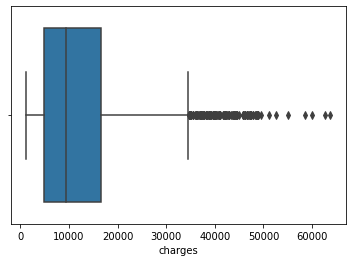

In [5]:
#Creating boxplot of charges to determine outliers
sns.boxplot(x=dataset['charges'])

<AxesSubplot:title={'center':'Size of Groups'}, xlabel='group'>

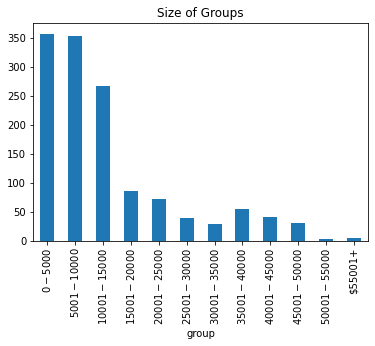

In [6]:
size_of_groups = dataset.loc[:, ['group', 'charges']].groupby('group')['charges'].nunique()
size_of_groups.plot.bar(x = 'group', title = "Size of Groups")

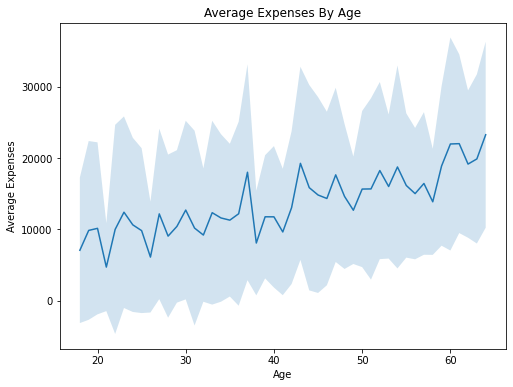

In [7]:
charge_by_age = dataset.loc[:, ["age", "charges"]].groupby("age")
age_ave = charge_by_age.mean()
x = age_ave.index
y = age_ave.charges
plt.rcParams["figure.figsize"] = (8, 6)
fig, ax = plt.subplots()
std_age = charge_by_age.std().charges.values
ax.fill_between(x, y-std_age, y+std_age, alpha = 0.2)
ax.set_title("Average Expenses By Age")
ax.set_xlabel("Age")
ax.set_ylabel("Average Expenses")
ax.plot(x, y)

<AxesSubplot:title={'center':'Average Expenses By BMI'}, xlabel='range'>

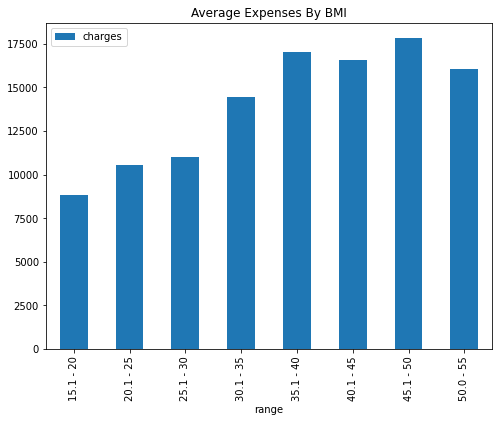

In [8]:
charge_by_bmi = dataset[["bmi", "charges"]].copy()
bmi_bins = [15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0]
charge_by_bmi["range"] = pd.cut(charge_by_bmi["bmi"], include_lowest=True, bins=bmi_bins, labels=["15.1 - 20", "20.1 - 25", "25.1 - 30", "30.1 - 35", "35.1 - 40", "40.1 - 45", "45.1 - 50", "50.0 - 55"])
bmi_ave = charge_by_bmi.groupby('range').mean()
bmi_ave.plot.bar(y="charges", title="Average Expenses By BMI")

<AxesSubplot:title={'center':'Average Charge By Number Of Children'}, xlabel='children'>

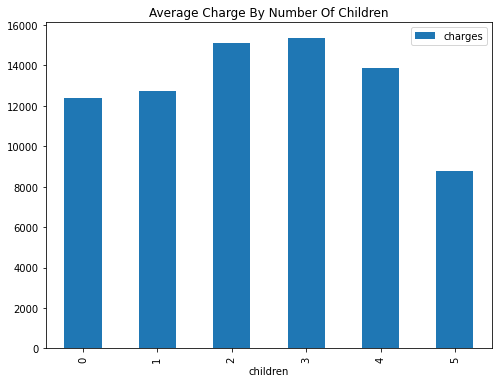

In [9]:
charge_by_children = dataset.loc[:, ["children", "charges"]].groupby("children")
child_ave = charge_by_children.mean()
child_df = pd.DataFrame(data = {"children": child_ave.index, "charges": child_ave.charges})
child_df.plot.bar(x = "children", y = "charges", title = "Average Charge By Number Of Children")

<AxesSubplot:title={'center':'Average Charge For Smoker Vs. Nonsmoker'}, xlabel='smoker'>

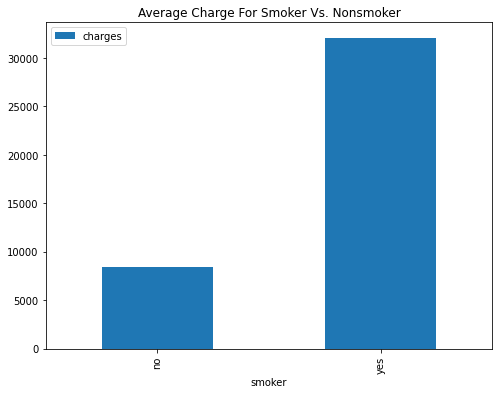

In [10]:
charge_by_smoking = dataset.loc[:, ["smoker", "charges"]].groupby("smoker")
smoking_ave = charge_by_smoking.mean()
smoking_df = pd.DataFrame(data = {"smoker": smoking_ave.index, "charges": smoking_ave.charges})
smoking_df.plot.bar(x = "smoker", y = "charges", title = "Average Charge For Smoker Vs. Nonsmoker")

<AxesSubplot:title={'center':'Average Charge By Region'}, xlabel='region'>

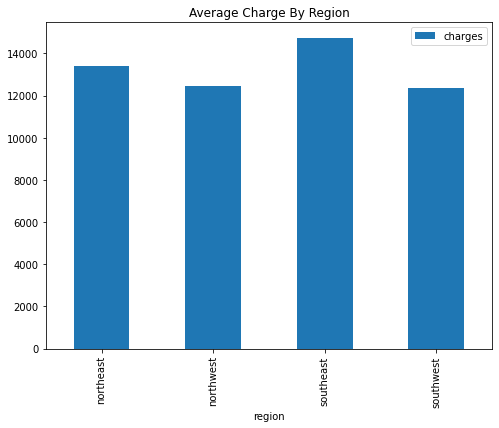

In [11]:
charge_by_region = dataset.loc[:, ["region", "charges"]].groupby("region")
region_ave = charge_by_region.mean()
region_df = pd.DataFrame(data = {"region": region_ave.index, "charges": region_ave.charges})
region_df.plot.bar(x = "region", y = "charges", title = "Average Charge By Region")

<AxesSubplot:title={'center':'Average Charge By Sex'}, xlabel='sex'>

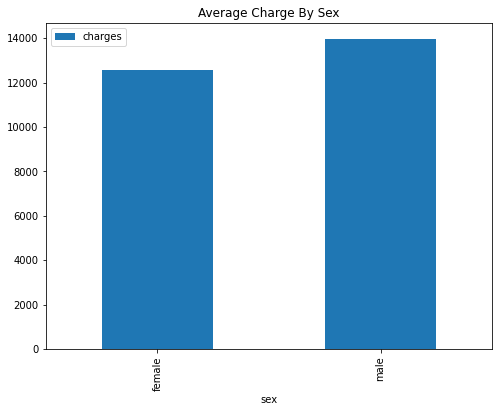

In [12]:
charge_by_sex = dataset.loc[:, ["sex", "charges"]].groupby("sex")
sex_ave = charge_by_sex.mean()
sex_df = pd.DataFrame(data = {"sex": sex_ave.index, "charges": sex_ave.charges})
sex_df.plot.bar(x = "sex", y = "charges", title = "Average Charge By Sex")

Starting Logistic Regression Program

In [13]:
#Dummy Values for Regression
dataset = (pd.get_dummies(dataset, columns = ["sex", "smoker", "region"], drop_first = True)).drop("charges", axis=1)
#Use LabelEncoder to set y for logistic regression model
dataset.group = le.fit_transform(dataset.group)

In [17]:
#Define independent & dependent variables
y = dataset["group"] #Dependent
x = dataset.drop(["group"], axis=1)
#Creating test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
lr2 = LogisticRegression(class_weight={0:0.48, 1:0.52}, C=15, penalty="l2", max_iter=3000)
lr2.fit(x_train, y_train)

C:\Users\Public\Python\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=15, class_weight={0: 0.48, 1: 0.52}, max_iter=3000)

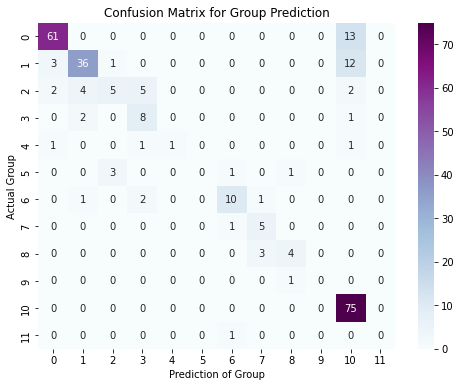

f1 score:  0.7453406902408088


In [19]:
y_pred_prob_test = lr2.predict_proba(x_test)[:, 1]
y_pred_test = lr2.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cm, annot=True, cmap="BuPu")
ax.set_title("Confusion Matrix for Group Prediction")
ax.set_xlabel("Prediction of Group")
ax.set_ylabel("Actual Group")
plt.show()
print("f1 score: ", f1_score(y_test, y_pred_test, average='weighted'))

In [20]:
#Input widgets
child_wid = widgets.Dropdown(options = [('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5+', 5)], value = 0,
                             description = 'Children: ',)
sex_wid = widgets.RadioButtons(options = ['Male', 'Female'], value = 'Male', description = 'Sex: ',)
smoke_wid = widgets.RadioButtons(options = ['Yes', 'No'], value = 'Yes', description = 'Smoker: ',)
region_wid = widgets.Dropdown(options = ['Northeast', 'Northwest', 'Southeast', 'Southwest'], value = 'Northeast',
                              description = 'Region: ',)
bmi_wid = widgets.FloatSlider(value = 22.0, min = 10.0, max = 50.0, step = 1.0, description = 'BMI: ', disabled = False,
                              continuous_update = False, orientation = 'horizontal', readout = True, readout_format = '.1f',)
age_wid = widgets.IntSlider(value = 25, min = 0, max = 110, step = 1, description = 'Age: ', disabled = False,
                            continuous_update = False, orientation = 'horizontal', readout = True, readout_format = 'd',)

def wid_calcs(age, child, sex, smoke, region, bmi):
    if not isinstance(age, int):
        print("Age must be an integer.")
        logger.warning("Age input not an integer.")
        return
    elif not isinstance(child, int):
        print("Number of children must be an integer.")
        logger.warning("Children input not an integer.")
        return
    elif not (sex == 'Female' or sex == 'Male'):
        print("Sex must be 'Male' or 'Females'.")
        logger.warning("Sex input not Male or Female.")
        return
    elif not (smoke == 'Yes' or smoke == 'No'):
        print("Smoking status must be 'Yes' or 'No'.")
        logger.warning("Smoking input not Yes or No.")
        return
    elif not (region == 'Northwest' or region == 'Southwest' or region == 'Northeast' or region == 'Southeast'):
        print("Region must be 'Northwest', 'Southwest', 'Northeast', or 'Southeast'.")
        logger.warning("Region input not Northwest, Southwest, Northeast, or Southeast.")
        return
    elif not isinstance(bmi, float):
        print("BMI must be a float.")
        logger.warning("BMI input not a float.")
        return
    
    a = age
    b = bmi
    c = child
    d = 0
    e = 0
    f = 0
    g = 0
    h = 0
    
    if sex=='Male':
        d = 1
    if smoke=='Yes':
        e = 1
    if region=='Northwest':
        f = 1
    elif region=='Southeast':
        g = 1
    elif region=='Southwest':
        h = 1
    
    data = {"age": [a], "bmi": [b], "children": [c], "sex_male": [d], "smoker_yes": [e], "region_northwest": [f],
            "region_southeast": [g], "region_southwest": [h]}
    input_data = pd.DataFrame(data=data)
    
    prediction = lr2.predict(input_data)
    print(le.inverse_transform(prediction))
    
wid_display = widgets.interactive(wid_calcs, age=age_wid, child=child_wid, sex=sex_wid, smoke=smoke_wid, region=region_wid,
                                  bmi=bmi_wid)
display(wid_display)

interactive(children=(IntSlider(value=25, continuous_update=False, description='Age: ', max=110), Dropdown(des…

In [21]:
with open('test_log.log') as logger:
    print(logger.read())

2022-08-11 08:47:40,343 - ERROR - Cannot open dataset

